In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pycaret.classification import *
%matplotlib inline
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('data/wisc_bc_data.csv')

In [16]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [20]:
# delete unnecessary columns
#df = df.drop(columns=['id', 'Unnamed: 32'], axis=1)

# statistical info
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
# setup the data
clf = setup(df, target='diagnosis')

,Description,Value
0,Session id,8223
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 32)"
5,Transformed data shape,"(569, 32)"
6,Transformed train set shape,"(398, 32)"
7,Transformed test set shape,"(171, 32)"
8,Numeric features,31
9,Preprocess,True


In [22]:
# train and test the models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9621,0.0000,0.9621,0.9631,0.9619,0.9177,0.9191,0.1000
lightgbm,Light Gradient Boosting Machine,0.9596,0.0000,0.9596,0.9612,0.9592,0.9122,0.9144,0.1870
qda,Quadratic Discriminant Analysis,0.9547,0.0000,0.9547,0.9583,0.9548,0.9040,0.9073,0.0240
lda,Linear Discriminant Analysis,0.9522,0.0000,0.9522,0.9558,0.9511,0.8940,0.8996,0.0210
rf,Random Forest Classifier,0.9496,0.0000,0.9496,0.9516,0.9491,0.8905,0.8933,0.1460
gbc,Gradient Boosting Classifier,0.9496,0.0000,0.9496,0.9525,0.9492,0.8911,0.8945,0.2440
ridge,Ridge Classifier,0.9495,0.0000,0.9495,0.9537,0.9479,0.8868,0.8935,0.0230
ada,Ada Boost Classifier,0.9395,0.0000,0.9395,0.9421,0.9391,0.8691,0.8724,0.1410
dt,Decision Tree Classifier,0.9347,0.0000,0.9347,0.9412,0.9347,0.8619,0.8679,0.0410
lr,Logistic Regression,0.9222,0.0000,0.9222,0.9247,0.9208,0.8287,0.8337,1.6750


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=8223, verbose=0,
                     warm_start=False)

In [24]:
# select the best model
model = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [25]:
# hyperparameter tuning
best_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9250,0.0000,0.9250,0.9271,0.9254,0.8421,0.8433
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9500,0.0000,0.9500,0.9500,0.9500,0.8933,0.8933
4,0.9750,0.0000,0.9750,0.9760,0.9748,0.9459,0.9473
5,0.9500,0.0000,0.9500,0.9537,0.9492,0.8904,0.8958
6,0.9500,0.0000,0.9500,0.9559,0.9505,0.8961,0.9010
7,0.9250,0.0000,0.9250,0.9375,0.9260,0.8462,0.8563
8,0.8974,0.0000,0.8974,0.8974,0.8974,0.7771,0.7771


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [29]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

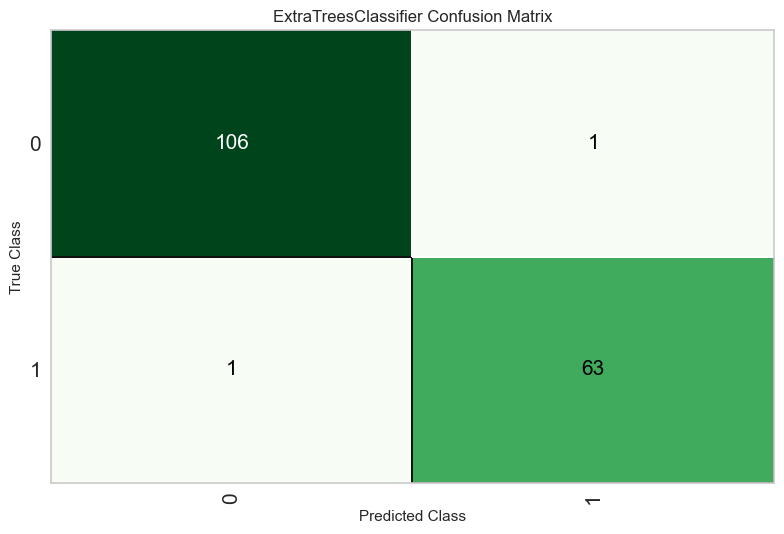

In [28]:
# plot the results
plot_model(estimator=best_model, plot='confusion_matrix')